In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# EDA

In [2]:
train = pd.read_csv(r'E:\PQJ\just do it\房租预测\train_data.csv')
test = pd.read_csv(r'E:\PQJ\just do it\房租预测\test_a.csv')

In [3]:
train.shape

(41440, 51)

In [4]:
train.head()

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,...,0,0.0000,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,...,0,0.0000,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,...,0,0.0000,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,...,332760000,3080.0331,8750,1665,253337,888.0,279.0,9,2018/12/21,1600.0
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,...,0,0.0000,800,117,125309,2038.0,480.0,0,2018/11/18,2900.0


In [5]:
#数据的统计描述
train.describe()

,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,...,41440.000000,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41422.000000,41422.000000,41440.000000,4.144000e+04
mean,1.001221e+08,70.959409,11.413152,1.338538,5.741192,187.197153,1.506395,48.228813,6.271911,4.308736,...,12621.406425,1.045363e+08,724.763918,77250.235497,1137.132095,294514.059459,26945.663512,3089.077085,0.396260,8.837074e+03
std,9.376566e+04,88.119569,7.375203,3.180349,4.604929,179.674625,1.687631,29.568448,4.946457,3.359714,...,49853.120341,5.215216e+08,3224.303831,132052.508523,7667.381627,196745.147181,32174.637924,2954.706517,1.653932,5.514287e+05
min,1.000000e+08,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,600.000000,0.000000,49330.000000,17.000000,6.000000,0.000000,0.000000e+00
25%,1.000470e+08,42.607500,6.000000,0.000000,2.000000,74.000000,0.000000,24.000000,2.000000,1.000000,...,0.000000,0.000000e+00,0.000000,13983.000000,0.000000,165293.000000,7928.000000,1053.000000,0.000000,2.800000e+03
50%,1.000960e+08,65.000000,7.000000,0.000000,5.000000,128.000000,1.000000,47.000000,5.000000,4.000000,...,0.000000,0.000000e+00,0.000000,38947.000000,0.000000,245872.000000,20196.000000,2375.000000,0.000000,4.000000e+03
75%,1.001902e+08,90.000000,16.000000,1.000000,7.000000,258.000000,3.000000,61.000000,9.000000,6.000000,...,0.000000,0.000000e+00,0.000000,76668.000000,0.000000,330610.000000,34485.000000,4233.000000,0.000000,5.500000e+03
max,1.003218e+08,15055.000000,88.000000,52.000000,22.000000,824.000000,8.000000,142.000000,24.000000,14.000000,...,555508.010000,6.197570e+09,37513.062490,855400.000000,143700.000000,928198.000000,621864.000000,39876.000000,37.000000,1.000000e+08


# 缺失值

In [6]:
pd.isnull(train).sum()

ID                     0
area                   0
rentType               0
houseType              0
houseFloor             0
totalFloor             0
houseToward            0
houseDecoration        0
communityName          0
city                   0
region                 0
plate                  0
buildYear              0
saleSecHouseNum        0
subwayStationNum       0
busStationNum          0
interSchoolNum         0
schoolNum              0
privateSchoolNum       0
hospitalNum            0
drugStoreNum           0
gymNum                 0
bankNum                0
shopNum                0
parkNum                0
mallNum                0
superMarketNum         0
totalTradeMoney        0
totalTradeArea         0
tradeMeanPrice         0
tradeSecNum            0
totalNewTradeMoney     0
totalNewTradeArea      0
tradeNewMeanPrice      0
tradeNewNum            0
remainNewNum           0
supplyNewNum           0
supplyLandNum          0
supplyLandArea         0
tradeLandNum           0


In [15]:
#仔细看每一列，其实这些也算缺失值
print('rentType:',list(train['rentType']).count("未知方式"))
print('houseToward:',list(train['houseToward']).count("暂无数据"))
print('houseDecoration:',list(train['houseDecoration']).count("其他"))
print('buildYear:',list(train['buildYear']).count("暂无信息"))

rentType: 30684
houseToward: 951
houseDecoration: 28976
buildYear: 2801


# 目标变量筛选

In [7]:
#目标变量的统计描述
train['tradeMoney'].describe()

count    4.144000e+04
mean     8.837074e+03
std      5.514287e+05
min      0.000000e+00
25%      2.800000e+03
50%      4.000000e+03
75%      5.500000e+03
max      1.000000e+08
Name: tradeMoney, dtype: float64

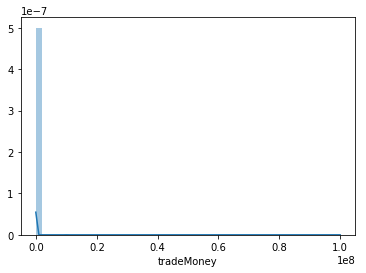

In [8]:
sns.distplot(train['tradeMoney'])

In [12]:
for i in range(1, 10):
    s = i*10000
    print('{}: {:.4f}'.format(s, len(train[train['tradeMoney'] < s]) / len(train)))

10000: 0.9332
20000: 0.9862
30000: 0.9953
40000: 0.9977
50000: 0.9983
60000: 0.9989
70000: 0.9991
80000: 0.9993
90000: 0.9994


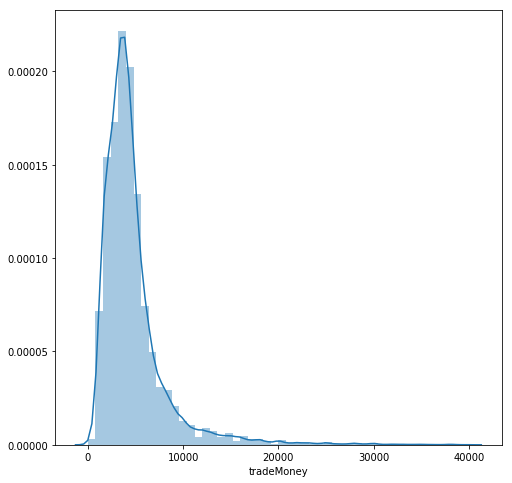

In [13]:
import pylab
pylab.rcParams['figure.figsize']=(8,8)

train = train[train['tradeMoney'] < 40000]
sns.distplot(train['tradeMoney'])

# 特征分析

In [23]:
df = pd.DataFrame()
df['feature'] = train.columns
df['num'] = train[train.columns].nunique().values
df.set_index('feature',drop=True,inplace=True)
print(df)

                      num
feature                  
ID                  41345
area                10290
rentType                4
houseType              99
houseFloor              3
totalFloor             53
houseToward            10
houseDecoration         4
communityName        4210
city                    1
region                 15
plate                  66
buildYear              80
saleSecHouseNum        28
subwayStationNum       13
busStationNum          59
interSchoolNum          7
schoolNum              44
privateSchoolNum       17
hospitalNum            11
drugStoreNum           42
gymNum                 39
bankNum                45
shopNum                56
parkNum                18
mallNum                17
superMarketNum         49
totalTradeMoney       704
totalTradeArea        705
tradeMeanPrice        705
tradeSecNum           333
totalNewTradeMoney    558
totalNewTradeArea     533
tradeNewMeanPrice     557
tradeNewNum           157
remainNewNum          392
supplyNewNum

In [24]:
#单调特征列
df[df['num']==1]

,num
feature,
city,1


In [29]:
#测试集只有训练集大概一半的小区名
print(train['communityName'].nunique())
print(test['communityName'].nunique())

4210
2469


In [32]:
train.dtypes

ID                      int64
area                  float64
rentType               object
houseType              object
houseFloor             object
totalFloor              int64
houseToward            object
houseDecoration        object
communityName          object
city                   object
region                 object
plate                  object
buildYear              object
saleSecHouseNum         int64
subwayStationNum        int64
busStationNum           int64
interSchoolNum          int64
schoolNum               int64
privateSchoolNum        int64
hospitalNum             int64
drugStoreNum            int64
gymNum                  int64
bankNum                 int64
shopNum                 int64
parkNum                 int64
mallNum                 int64
superMarketNum          int64
totalTradeMoney         int64
totalTradeArea        float64
tradeMeanPrice        float64
tradeSecNum             int64
totalNewTradeMoney      int64
totalNewTradeArea       int64
tradeNewMe

In [54]:
#只有三种数据类型，int/float/object
#特征值大于100的特征

for cols in train.columns:
    if train[cols].nunique()>100:
        print(cols)

ID
area
communityName
totalTradeMoney
totalTradeArea
tradeMeanPrice
tradeSecNum
totalNewTradeMoney
totalNewTradeArea
tradeNewMeanPrice
tradeNewNum
remainNewNum
supplyNewNum
newWorkers
pv
uv
tradeTime
tradeMoney


In [57]:
#特征值大于100的obiect特征
for cols in train.columns:
    if train[cols].nunique()>100 and str(train[cols].dtype)=='object':
        print(cols)

communityName
tradeTime


# label分布

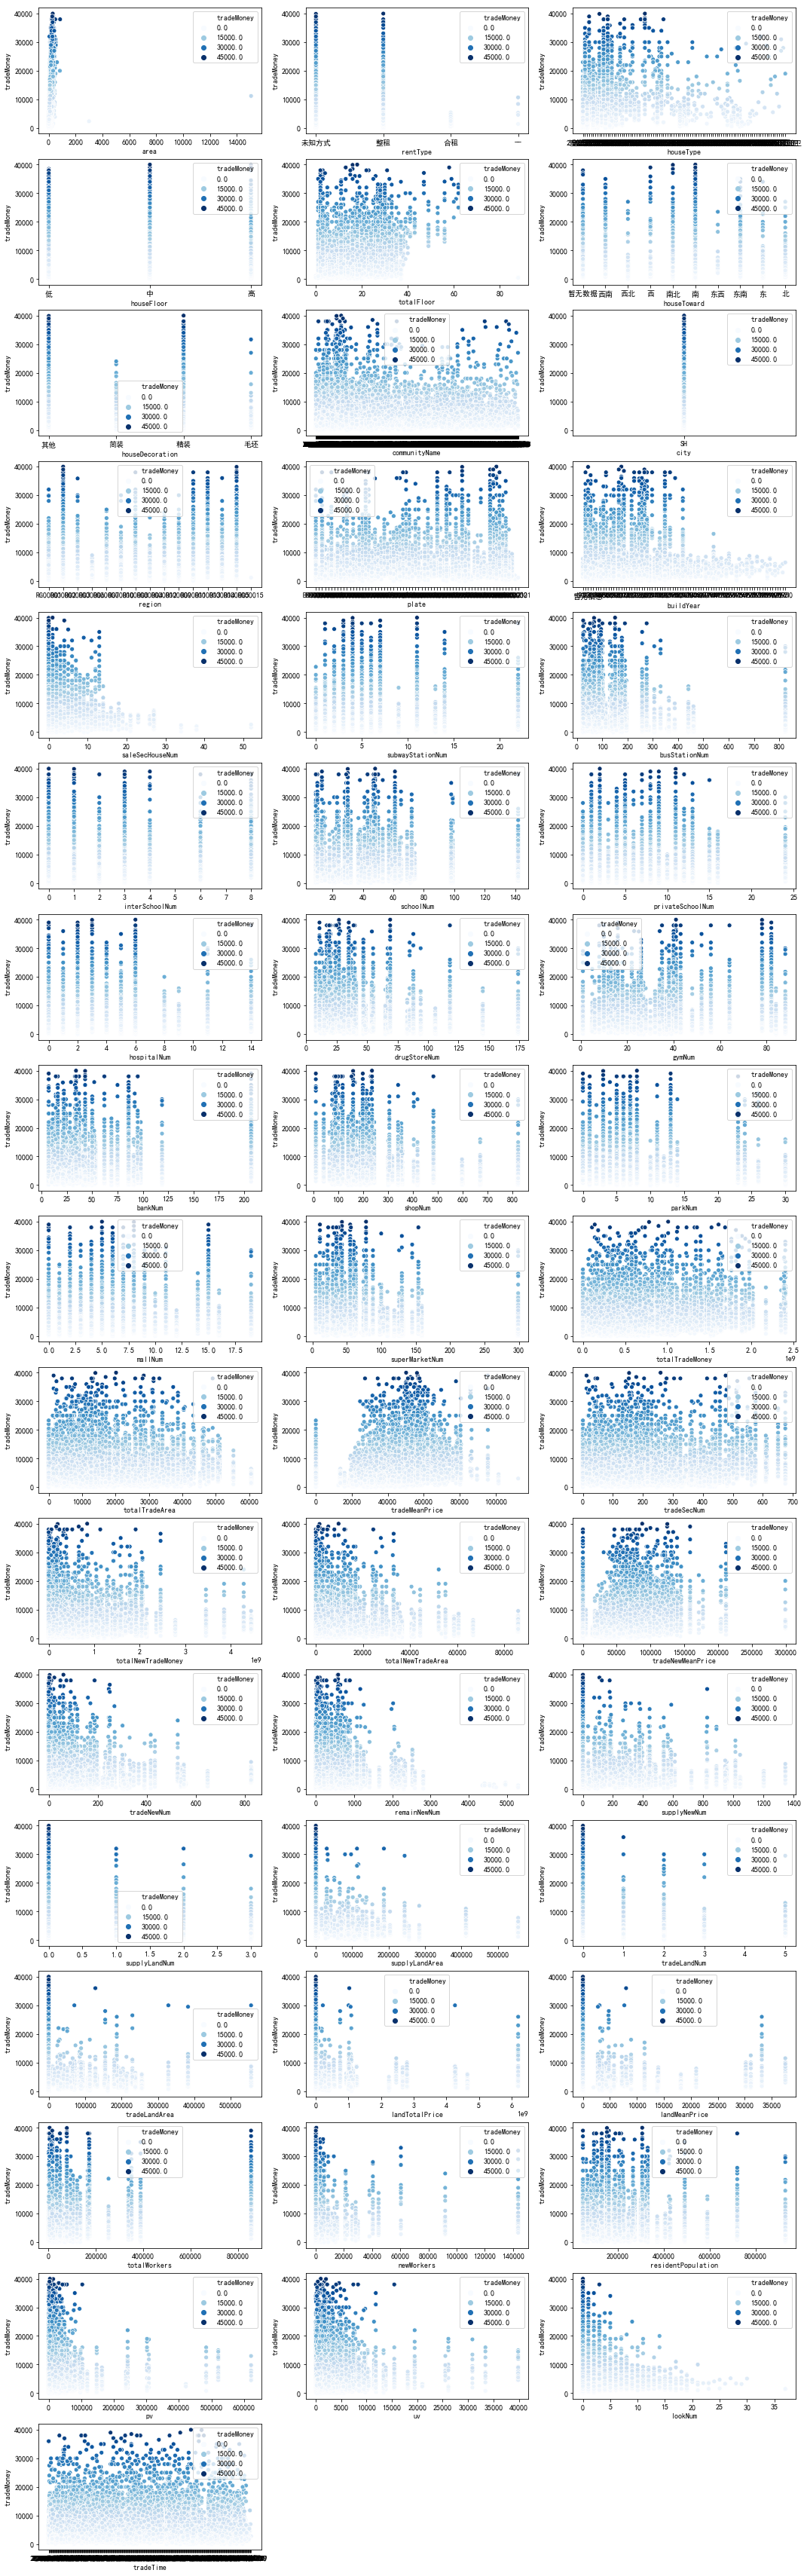

In [75]:
# drop_feature = ['ID','tradeMoney']
# #特征-目标的散点图
pylab.rcParams['figure.figsize']=(18,180)
feature = list(train.columns)

feature.remove('ID')
feature.remove('tradeMoney')
for i, f in enumerate(feature,1):
    plt.subplot(len(feature), 3,i)
    sns.scatterplot(x=f, y='tradeMoney', hue='tradeMoney', palette='Blues', data=train)